目前关于根据图像反向来预测相机参数的一些想法和参考论文。
模型
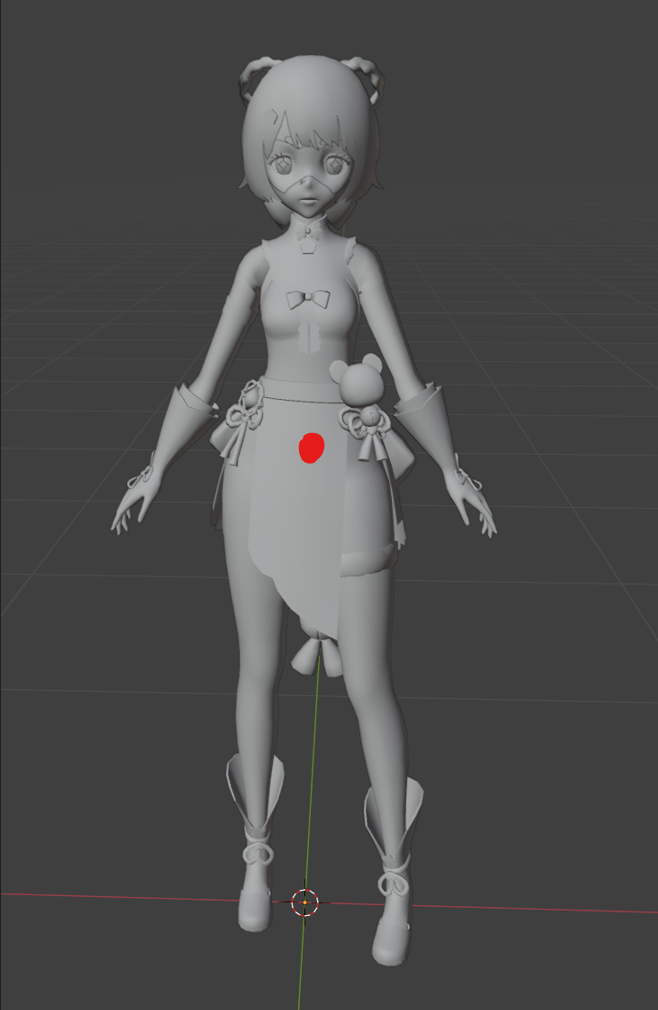
目前希望以这个标准模型的正视角为相机旋转的0点，红点位置为模型的hips，意为基准点来进行相机参数的判断。其中，因为hips一般是制作模型的原点，同时基本很少有旋转角度，以此为基准是为了尽可能减少不同的pose对于我们判断相机参数的影响，比如朝向前方却转身回头看。如下图，这类图其实依旧是背对相机，只是因为头部的pose改变产生了回头看的样子，如果选择其他容易旋转的关键点，则会错误的进行判断相机参数。
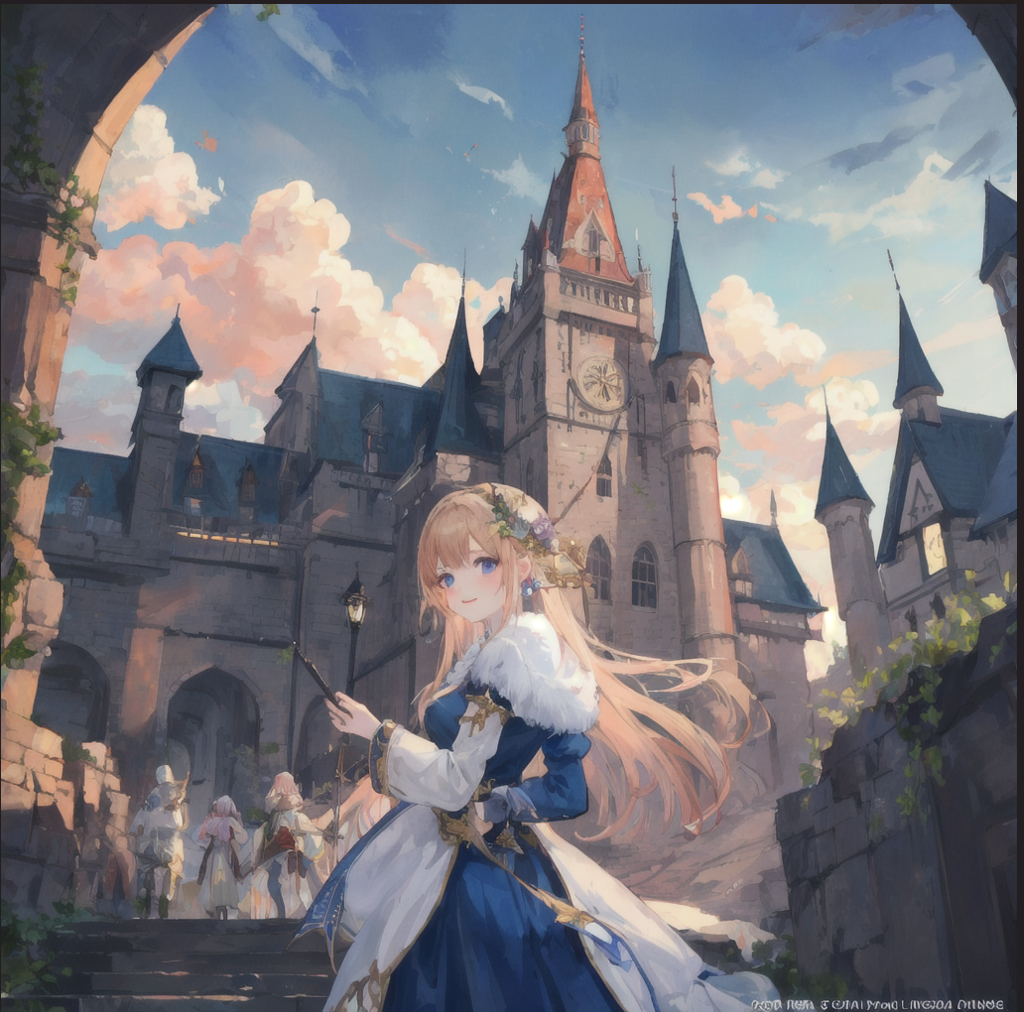

目前的想法是通过图片来识别出给定生成图像中的hips点位置，之后和该hips点相对应（位置+法线信息，这两个参数相匹配基本可以确定相机的参数），来判断相机参数。但该方法目前存在一系列问题。如下图
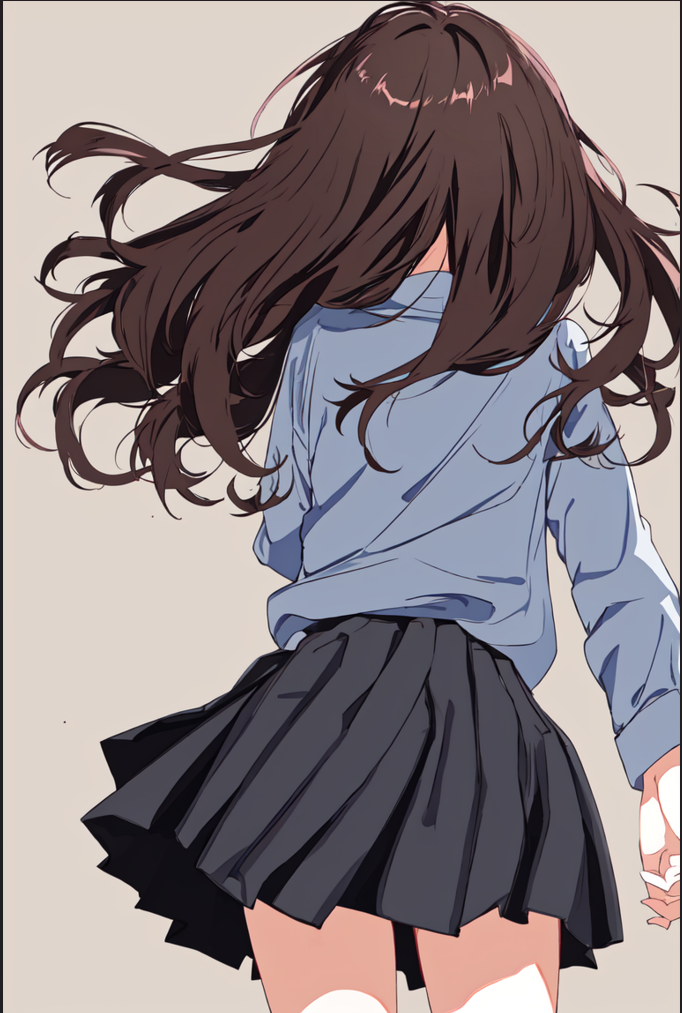

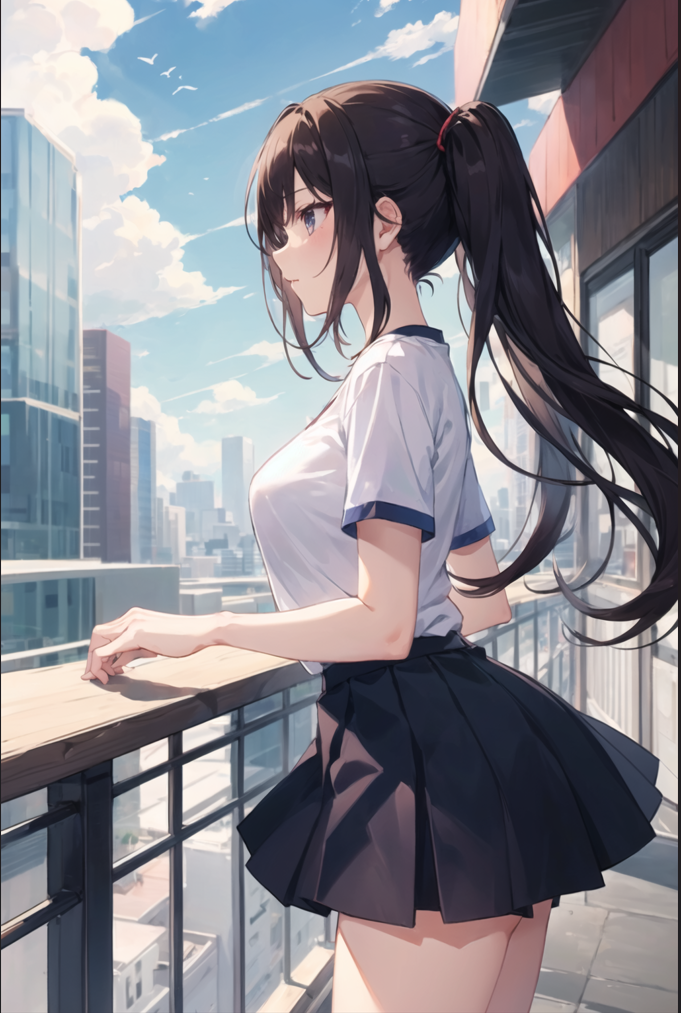

这两张图都展现了该方法存在的问题，即该hips点是没有被渲染而是被遮挡的，所以无法进行判断。同时，仅仅依靠一个点的匹配也会产生一些不可靠的问题，比如虽然图像是正面，但只是半身图像，hips该点并没有被看到，此时我们可能会把判断的基准点更换为neck，即下图中绿点位置，如这些点都没被看见，则只单纯按照被看到的关节进行关键点匹配
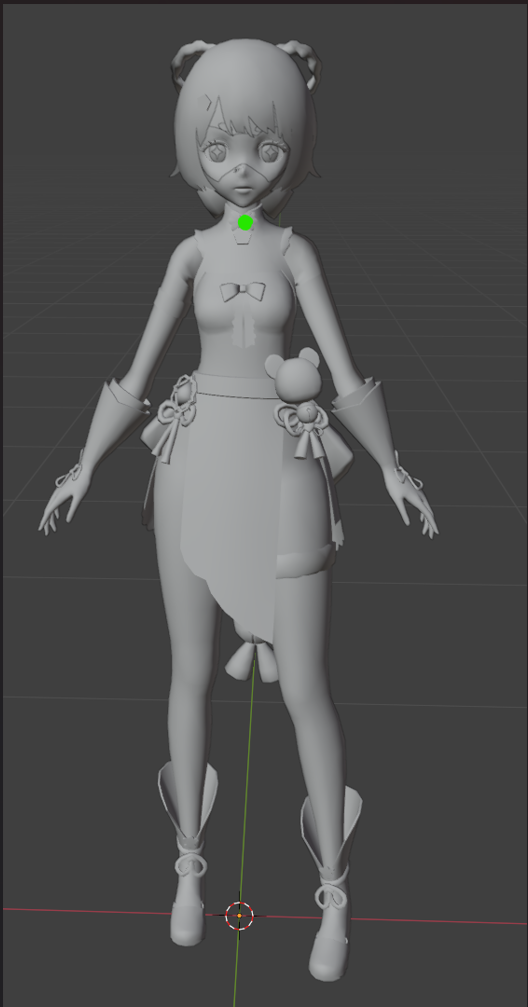

关键点匹配方法目前看是可行的方法之一，但是问题是上述那些图中被遮挡时就会产生问题。另外一种想法是通过识别算法识别出关节，然后将这些关节的关键点映射到我们预设的一个3D模型上，来做对应点的匹配（这里可能不需要精确匹配，可以借鉴BA那个算法，计算多个点的距离差的和最小即可，以此作为优化目标更加合理），这个方法目前问题是还没找到一个已有的方法效果比较好能直接将识别的pose关节关键点映射到一个3D模型和物体表面上。
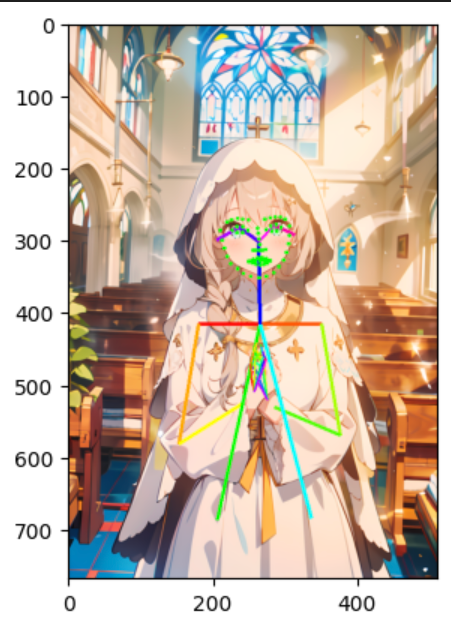


这些是我最近看的一些相关工作，但都和我们实际需求有差距
https://github.com/facebookresearch/detectron2/blob/main/projects/DensePose/doc/GETTING_STARTED.md
https://github.com/Andyen512/DDHPose

第三个是我们是否要考虑将图像中的人物先通过重建和生成算法转换成真实的mesh，如目前已有的一些方法，这样对于理解来说比较容易，但由于姿势的多样性，即使转换成mesh依旧难以通过对应点相匹配的方式来确定正确的相机参数，如下图
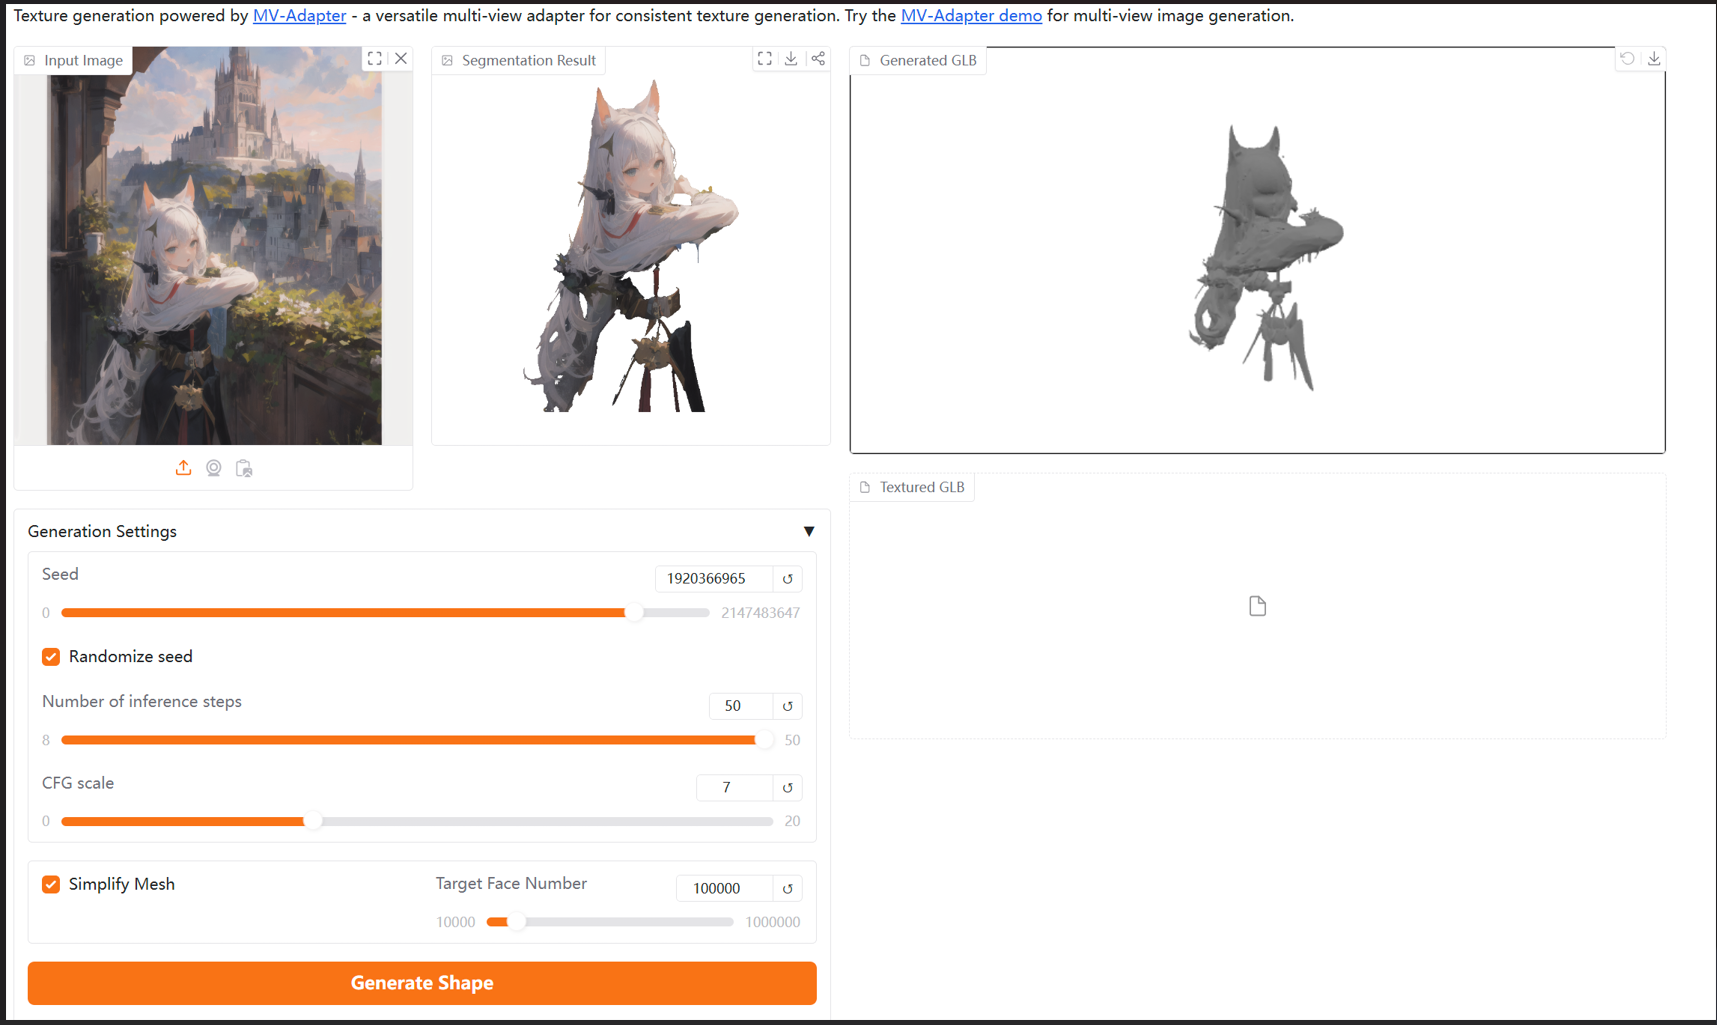

这种方法也许需要考虑的是分割mesh，然后通过mesh的相似程度来进行判断，但依旧十分困难，非常难以量化我们的评判标准。


之后的计划
todo：目前我们验证了通过修改attention或者加条件可能来控制生成的相机视角和姿势，效果还行，这个反向判断使我们下一步的工作，这两个前置工作如果都ok了的话，最后我们应该就拉一堆数据，用这个反向判断的模型做标注和RL来训练可以自由控制相机参数的模型应该就可以，预期是会有效果的。最终我们需要拉下来一个大数据集训练来保证生成结果的多样性，而不是目前我们生成的都是黑底，一个单一姿势的模型。